## Rubric

Instructions: DELETE this cell before you submit via a `git push` to your repo before deadline. This cell is for your reference only and is not needed in your report. 

Scoring: Out of 10 points

- Each Developing  => -2 pts
- Each Unsatisfactory/Missing => -4 pts
  - until the score is 

If students address the detailed feedback in a future checkpoint they will earn these points back


|                  | Unsatisfactory                                                                                                                                                                                                    | Developing                                                                                                                                                                                              | Proficient                                     | Excellent                                                                                                                              |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| Data relevance   | Did not have data relevant to their question. Or the datasets don't work together because there is no way to line them up against each other. If there are multiple datasets, most of them have this trouble | Data was only tangentially relevant to the question or a bad proxy for the question. If there are multiple datasets, some of them may be irrelevant or can't be easily combined.                       | All data sources are relevant to the question. | Multiple data sources for each aspect of the project. It's clear how the data supports the needs of the project.                         |
| Data description | Dataset or its cleaning procedures are not described. If there are multiple datasets, most have this trouble                                                                                              | Data was not fully described. If there are multiple datasets, some of them are not fully described                                                                                                      | Data was fully described                       | The details of the data descriptions and perhaps some very basic EDA also make it clear how the data supports the needs of the project. |
| Data wrangling   | Did not obtain data. They did not clean/tidy the data they obtained.  If there are multiple datasets, most have this trouble                                                                                 | Data was partially cleaned or tidied. Perhaps you struggled to verify that the data was clean because they did not present it well. If there are multiple datasets, some have this trouble | The data is cleaned and tidied.                | The data is spotless and they used tools to visualize the data cleanliness and you were convinced at first glance                      |


# COGS 108 - Data Checkpoint

## Authors


This is a modified [CRediT taxonomy of contributions](https://credit.niso.org). For each group member please list how they contributed to this project using these terms:
> Analysis, Background research, Conceptualization, Data curation, Experimental investigation, Methodology, Project administration, Software, Visualization, Writing – original draft, Writing – review & editing

Example team list and credits:
- Alice Anderson: Conceptualization, Data curation, Methodology, Writing - original draft
- Bob Barker:  Analysis, Software, Visualization
- Charlie Chang: Project administration, Software, Writing - review & editing
- Dani Delgado: Analysis, Background research, Visualization, Writing - original draft

## Research Question

Does a decline of 50% or more in average monthly players within the first 12 months after a game’s peak significantly predict whether a Steam game will experience a sustained collapse in player engagement, defined as falling to 5% of its peak concurrent players, within the following 24 months?



Does a decline of 50% or more in average monthly players within the first 12 months after a game’s peak significantly predict whether a Steam game will experience a sustained collapse in player engagement, defined as falling to 5% of its peak concurrent players, within the following 24 months?


## Background and Prior Work

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Hypothesis


Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Data

### Data overview

Instructions: REPLACE the contents of this cell with descriptions of your actual datasets.

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
  - Description of the variables most relevant to this project
  - Descriptions of any shortcomings this dataset has with repsect to the project
- Dataset #2 (if you have more than one!)
  - same as above
- etc

Each dataset deserves either a set of bullet points as above or a few sentences if you prefer that method.

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

In [1]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

In [2]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://drive.google.com/uc?id=14-RTZD1GOc_JKGs32btNxfLe4bZ9WTOw', 'filename':'steamcharts.csv'}]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]         

Successfully downloaded: steamcharts.csv


### Dataset #1 

Instructions: 
1. Change the header from Dataset #1 to something more descriptive of the dataset
2. Write a few paragraphs about this dataset. Make sure to cover
   1. Describe the important metrics, what units they are in, and giv some sense of what they mean.  For example "Fasting blood glucose in units of mg glucose per deciliter of blood.  Normal values for healthy individuals range from 70 to 100 mg/dL.  Values 100-125 are prediabetic and values >125mg/dL indicate diabetes. Values <70 indicate hypoglycemia. Fasting idicates the patient hasn't eaten in the last 8 hours.  If blood glucose is >250 or <50 at any time (regardless of the time of last meal) the patient's life may be in immediate danger"
   2. If there are any major concerns with the dataset, describe them. For example "Dataset is composed of people who are serious enough about eating healthy that they voluntarily downloaded an app dedicated to tracking their eating patterns. This sample is likely biased because of that self-selection. These people own smartphones and may be healthier and may have more disposable income than the average person.  Those who voluntarily log conscientiously and for long amounts of time are also likely even more interested in health than those who download the app and only log a bit before getting tired of it"
3. Use the cell below to 
    1. load the dataset 
    2. make the dataset tidy or demonstrate that it was already tidy
    3. demonstrate the size of the dataset
    4. find out how much data is missing, where its missing, and if its missing at random or seems to have any systematic relationships in its missingness
    5. find and flag any outliers or suspicious entries
    6. clean the data or demonstrate that it was already clean.  You may choose how to deal with missingness (dropna of fillna... how='any' or 'all') and you should justify your choice in some way
    7. You will load raw data from `data/00-raw/`, you will (optionally) write intermediate stages of your work to `data/01-interim` and you will write the final fully wrangled version of your data to `data/02-processed`
4. Optionally you can also show some summary statistics for variables that you think are important to the project
5. Feel free to add more cells here if that's helpful for you


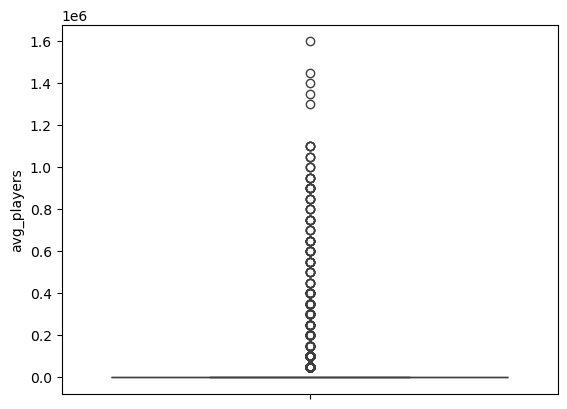

In [6]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
import pandas as pd 
import seaborn as sns 

df_charts = pd.read_csv('data/00-raw/steamcharts.csv') 
shape = df_charts.shape 
print(shape)

df_charts.dropna()

df_charts['avg_players'] = df_charts['avg_players'].apply(round) #Round avg_players to the nearest whole 
#Function to round to nearest thousandth 
def rounder(num): 
    return round(num, 3) 
    
df_charts['gain_percent'] = df_charts['gain_percent'].apply(rounder) #Round percentage to nearest 3 decimals 

df_clean = df_charts[['month','avg_players','gain_percent','peak_players','name','steam_appid']]

#def rounding(num): 
#    num = num/50000
#    return round(num) * 50000

#df_avg_player = df_clean['avg_players'].apply(rounding)
#avg_player_plot = sns.boxplot(data = df_avg_player)
    
clean_box = sns.boxplot(data = df_clean)

#percent_plot = sns.scatterplot(data = df_clean['gain_percent'])

#df_clean['avg_players'].sort_values().head(5)
#df_clean['gain_percent'].sort_values().head(5)
#df_clean['peak_players'].sort_values().head(5)

max_avg = max(df_clean['avg_players'])
max_gain = max(df_clean['gain_percent'])
max_peak =  max(df_clean['peak_players'])

print('--------------------------------')
print('MAX AVERAGE PLAYER COUNT: ')
print(df_clean.loc[df_clean['avg_players'] == max_avg])
print('--------------------------------')

print('MAX PERCENT GAIN: ')
print(df_clean.loc[df_clean['gain_percent'] == max_gain])
print('--------------------------------')

print('MAX PEAK PLAYER COUNT')
print(df_clean.loc[df_clean['peak_players'] == max_peak])
print('--------------------------------')

#print('Max Average Player Count: ' + str(max_avg) + ' Game Name: ' + str(df_clean.loc[df_clean['avg_players'] == max_avg]))
#print('Max Percentage Gain: ' + str(max_gain) + ' Game Name: ' + str(df_clean.loc[df_clean['gain_percent'] == max_gain]))
#print('Max Peak Player Count: ' + str(max_peak) + ' Game Name: ' + str(df_clean.loc[df_clean['peak_players'] == max_peak]))

#avg_players_box = sns.scatterplot(data = df_clean['avg_players'])
#gain_percent_box = sns.scatterplot(data = df_clean['gain_percent'])
#peak_players_box = sns.scatterplot(data = df_clean['peak_players'])

### Dataset #2 

See instructions above for Dataset #1.  Feel free to keep adding as many more datasets as you need.  Put each new dataset in its own section just like these. 

Lastly if you do have multiple datasets, add another section where you demonstrate how you will join, align, cross-reference or whatever to combine data from the different datasets

Please note that you can always keep adding more datasets in the future if these datasets you turn in for the checkpoint aren't sufficient.  The goal here is demonstrate that you can obtain and wrangle data.  You are not tied down to only use what you turn in right now.

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE


## Ethics

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback

## Team Expectations 

Instructions: REPLACE the contents of this cell with your work, including any updates to recover points lost in your proposal feedback


## Project Timeline Proposal

Instructions: Replace this with your timeline.  **PLEASE UPDATE your Timeline!** No battle plan survives contact with the enemy, so make sure we understand how your plans have changed.  Also if you have lost points on the previous checkpoint fix them